In [106]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import gutenberg
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import math
from textblob import TextBlob as tb

***Drill: tf-idf scores***

In [107]:
#Define tf_idf
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [108]:
#Data
phrase1 = tb("The best Monty Python sketch is the one about the dead parrot, I laughed so hard.")
phrase2 = tb("I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!")
phrase3 = tb("Chocolate is the best ice cream dessert topping, with a great taste.")
phrase4 = tb("The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.")
phrase5 = tb("I would rather put strawberries on my ice cream for dessert, they have the best taste.")
phrase6 = tb("The taste of caramel is a fantastic accompaniment to tasty mint ice cream.")

In [109]:
#Build list and vocabulary
bloblist = [phrase1, phrase2, phrase3, phrase4, phrase5, phrase6]
voc = ['Monty', 'Python', 'sketch', 'laugh', 'funny', 'best', 'ice cream', 'dessert', 'taste']

for i, blob in enumerate(bloblist):
    print("Top words in phrase {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in voc}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:9]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in phrase 1
	Word: sketch, TF-IDF: 0.04332
	Word: Monty, TF-IDF: 0.04332
	Word: Python, TF-IDF: 0.02534
	Word: best, TF-IDF: 0.0114
	Word: taste, TF-IDF: 0.0
	Word: funny, TF-IDF: 0.0
	Word: laugh, TF-IDF: 0.0
	Word: ice cream, TF-IDF: 0.0
	Word: dessert, TF-IDF: 0.0
Top words in phrase 2
	Word: funny, TF-IDF: 0.16479
	Word: laugh, TF-IDF: 0.05493
	Word: sketch, TF-IDF: 0.03466
	Word: Python, TF-IDF: 0.02027
	Word: best, TF-IDF: 0.00912
	Word: taste, TF-IDF: 0.0
	Word: ice cream, TF-IDF: 0.0
	Word: Monty, TF-IDF: 0.0
	Word: dessert, TF-IDF: 0.0
Top words in phrase 3
	Word: dessert, TF-IDF: 0.05776
	Word: taste, TF-IDF: 0.03379
	Word: best, TF-IDF: 0.01519
	Word: funny, TF-IDF: 0.0
	Word: laugh, TF-IDF: 0.0
	Word: sketch, TF-IDF: 0.0
	Word: ice cream, TF-IDF: 0.0
	Word: Monty, TF-IDF: 0.0
	Word: Python, TF-IDF: 0.0
Top words in phrase 4
	Word: Monty, TF-IDF: 0.04077
	Word: Python, TF-IDF: 0.02385
	Word: best, TF-IDF: 0.0
	Word: taste, TF-IDF: 0.0
	Word: funny, TF-IDF: 0.0
	Wor

In [110]:
corpus = ["The best Monty Python sketch is the one about the dead parrot, I laughed so hard.",
          "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!",
          "Chocolate is the best ice cream dessert topping, with a great taste.",
          "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.",
          "I would rather put strawberries on my ice cream for dessert, they have the best taste.",
          "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."]

vectorizer = TfidfVectorizer(min_df=1)

X = vectorizer.fit_transform(corpus)

idf = vectorizer.idf_

features = vectorizer.get_feature_names()
tfidf = dict(zip(vectorizer.get_feature_names(), idf))
tfidf

{'about': 1.8472978603872037,
 'accompaniment': 2.2527629684953681,
 'best': 1.336472236621213,
 'bit': 2.2527629684953681,
 'can': 2.2527629684953681,
 'caramel': 2.2527629684953681,
 'chocolate': 2.2527629684953681,
 'cream': 1.5596157879354227,
 'dead': 2.2527629684953681,
 'dessert': 1.8472978603872037,
 'fantastic': 2.2527629684953681,
 'for': 2.2527629684953681,
 'funniest': 2.2527629684953681,
 'funny': 2.2527629684953681,
 'great': 2.2527629684953681,
 'hard': 2.2527629684953681,
 'have': 2.2527629684953681,
 'ice': 1.5596157879354227,
 'is': 1.1541506798272583,
 'it': 1.8472978603872037,
 'laugh': 2.2527629684953681,
 'laughed': 2.2527629684953681,
 'laughing': 2.2527629684953681,
 'lumberjack': 2.2527629684953681,
 'ministry': 2.2527629684953681,
 'mint': 2.2527629684953681,
 'monty': 1.8472978603872037,
 'my': 2.2527629684953681,
 'of': 1.5596157879354227,
 'on': 2.2527629684953681,
 'one': 2.2527629684953681,
 'parrot': 2.2527629684953681,
 'put': 2.2527629684953681,
 'pyth

***Drills***

In [111]:
#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')

#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    para=[re.sub(r'VOLUME \w+', '', word) for word in para]
    para=[re.sub(r'CHAPTER \w+', '', word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [112]:
#Split data and vectorize
X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.9, # drop words that occur in more than half the paragraphs
                             min_df=10, # only use words that appear at X times (being X the number used)
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=False,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                           )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 382
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.70710678118654746, 'present': 0.70710678118654746}


In [113]:
#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 75.8663260096
Component 0:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     0.800488
Emma c

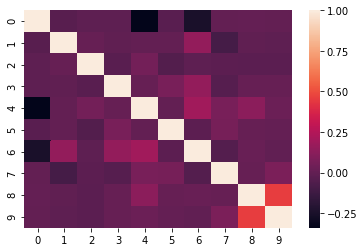

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [114]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

***Drill 0: Test set***

In [115]:
#Reshapes the vectorizer output into something people can read
X_test_tfidf_csr = X_test_tfidf.tocsr()

#number of paragraphs
n = X_test_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_test_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_test_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_test[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
Tf_idf vector: {'really': 0.35355339059327373, 'pass': 0.35355339059327373, 'assure': 0.35355339059327373, 'mrs': 0.35355339059327373, 'friends': 0.35355339059327373, 'quite': 0.35355339059327373, 'elton': 0.35355339059327373, 'replied': 0.35355339059327373}


In [116]:
#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 79.6598094568
Component 0:
The event was more favourable to Mr . Woodhouse than to Emma .                                                                                                                                                                            0.717394
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                  0.698278
In this walk Emma and Mr . Weston found all the others assembled ; and towards this view she immediately perceived Mr . Knightley and Harriet distinct from the rest , quietly leading the way .                                          0.697127
" He is a person I never think of from one month ' s end to another ," said Mr . Knightley , with a degree of vexation , which made Emma immediately talk of something else , though she could not comp

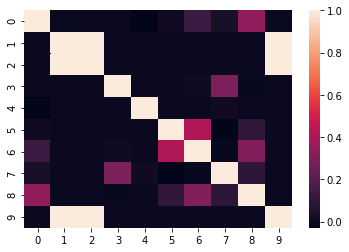

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .
5 " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
6 " And here is Mrs . Weston and Mr . Frank Churchill too ! Quite delightful ; so many friends !"
7 " You may well class the delight , the honour , and the comfo

In [117]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

The heatmap shows that sentences 1,2 present similarity between them and with sentence 9 as oh! appears in all of them.

***Drill 1: Tweaking tf-idf***

When the threshold regarding the number of times that a word appears (min_df) increases (from 2 to 10), the noise is reduced reducing the number of features significantly (form >2000 to <1000) and the percentage of variance explained increases to 68%.

Dropping the words that appear in certain number of paragraphs (max_df) from (0.5 to 0.2) has a lower impact than the number of times a word appears in the text. It could be due to the fact that after cleaning the text from punctuation and stopwords there are not too many words that appear in more than one of the paragraphs. Increasing this threshold makes the number of features higher as it will be harder to find words that are repeated in a higher number of paragraphs.

The use of n-grams in a range 1-3 penalises the number of features used to have the same percentage of variance explained. More features are required to achieve the same level of variance.

Not using inverse frequency in the vectorizer increases the variance explained up to 75% with the same number of features than when it is used. In  this case, max_df has a significant impact in the level of variance explained (73% for 0.1 to 76% with 0.9) with the same number of features (roughly 382-5)
